# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [192]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [194]:
A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [313]:
def integer_spiral_numpy(n):
    A = np.zeros((n + 2, n + 2));

    row_mid = n//2 + 1 # počáteční pozice: střed matice
    col_mid = n//2 + 1

    A[row_mid, col_mid] = 1

    for i in range(n//2):
        l = 2*i + 1
        start = (l + 2)**2 + 1

        A[row_mid+i+1, col_mid-i-1:col_mid+i+2] = np.arange(start - l - 2, start)
        start -= l + 2

        A[row_mid-i:row_mid+i+1, col_mid-i-1] = np.arange(start - l, start).T
        start -= l + 1

        A[row_mid-i-1, col_mid+i+1:col_mid-i-2:-1] = np.arange(start - l - 1, start + 1)
        start -= l + 2
        
        A[row_mid+i:row_mid-i-1:-1, col_mid+i+1] = np.arange(start - l + 1, start + 1).T
        start -= l + 1

    return A[1:-1, 1:-1].astype(np.int32)

In [314]:
A = integer_spiral_numpy(7)
print(A)

m = 1001

[[37 36 35 34 33 32 31]
 [38 17 16 15 14 13 30]
 [39 18  5  4  3 12 29]
 [40 19  6  1  2 11 28]
 [41 20  7  8  9 10 27]
 [42 21 22 23 24 25 26]
 [43 44 45 46 47 48 49]]


In [199]:
%timeit integer_spiral_numpy(m)

6.12 ms ± 449 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [200]:
%timeit integer_spiral(m)

907 ms ± 68.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
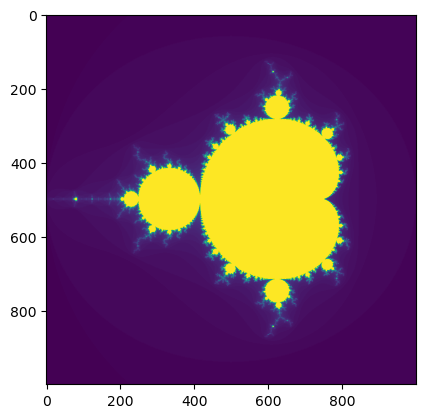

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [48]:
# Tady jsem si chtel jenom srovnat, o kolik je naivni postup pomalejsi, nez postup za pomoci numpy.

def mandelbrot_set_naive(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    re = np.linspace(-2, 1, n, dtype=np.float128)
    im = 1j*np.linspace(-1.5, 1.5, n, dtype=np.float128)
    
    div_mat = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            z = 0
            c = re[i] + im[j]

            for l in range(k):
                z = z*z + c
                if(np.abs(z) > 2):
                    div_mat[j, i] = l
                    break
            else:
                div_mat[j, i] = l

    return div_mat


In [273]:
def mandelbrot_set_numpy(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    re, im = np.ogrid[x_min:x_max:n*1j, y_min:y_max:n*1j]
    c = re + 1j*im
    z = np.zeros((n,n))
    div_mat = np.zeros((n, n))

    for i in range(k):
        z = z*z + c
        div_mat[(np.abs(z) > 2) & (div_mat == 0)] = i
        z[np.abs(z) > 2] = 0
    else:
        div_mat[div_mat == 0] = i

    return div_mat.T

In [231]:
n = 1000
k = 100

In [143]:
%timeit mandelbrot_set_naive(n=n, k=k)

# Pri poslednim mereni trvala doba behu cca 25s

25.5 s ± 1.38 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [277]:
%timeit mandelbrot_set_numpy(n=n, k=k)

# Zatimco pri pouziti numpy jsem nameril cca 1.5s

/tmp/ipykernel_5126/138739650.py:8: RuntimeWarning: overflow encountered in multiply
  z = z*z + c
/tmp/ipykernel_5126/138739650.py:8: RuntimeWarning: invalid value encountered in multiply
  z = z*z + c


1.45 s ± 197 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/tmp/ipykernel_5126/138739650.py:8: RuntimeWarning: overflow encountered in multiply
  z = z*z + c
/tmp/ipykernel_5126/138739650.py:8: RuntimeWarning: invalid value encountered in multiply
  z = z*z + c


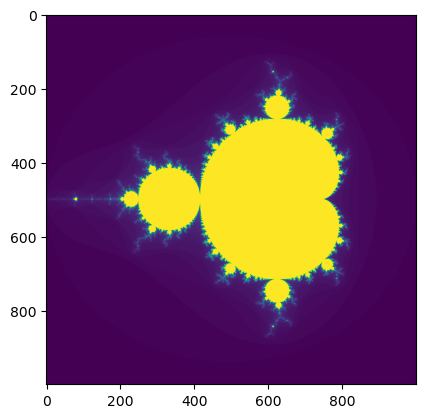

In [278]:
# Normalni vykresleni s rozlisenim dle zadani

divergence_matrix = mandelbrot_set_numpy(n=n, k=k)
plt.imshow(divergence_matrix)

/tmp/ipykernel_5126/138739650.py:8: RuntimeWarning: overflow encountered in multiply
  z = z*z + c
/tmp/ipykernel_5126/138739650.py:8: RuntimeWarning: invalid value encountered in multiply
  z = z*z + c


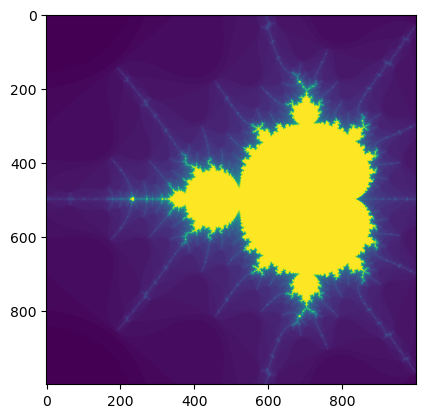

In [297]:
# Mandelbrotova mnozina, ale priblizena na interval [-1.8, -1.74] x [-0.3, 0.3]. Vidime, ze tvar je uplne stejny, az na ty "divne koncetiny".

divergence_matrix_zoomed = mandelbrot_set_numpy(x_min=-1.8, x_max=-1.74, y_min=-0.03, y_max=0.03, n=n, k=k)
plt.imshow(divergence_matrix_zoomed)

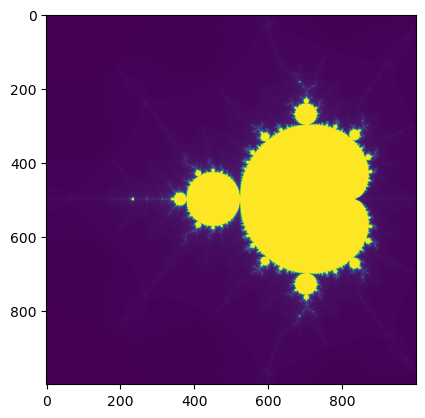

In [228]:
# Stejne priblizeni, ale vice iteraci.
k = 500

divergence_matrix_zoomed = mandelbrot_set_numpy(x_min=-1.8, x_max=-1.74, y_min=-0.03, y_max=0.03, n=n, k=k)
plt.imshow(divergence_matrix_zoomed)

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral). Stačí vytvořit matici kde 

In [294]:
def julia_set(c, x_min = -1.5, x_max = 1.5, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    re, im = np.ogrid[x_min:x_max:n*1j, y_min:y_max:n*1j]
    z = re + 1j*im
    div_mat = np.zeros((n, n))

    for i in range(k):
        z = z*z + c
        div_mat[(np.abs(z) > 2) & (div_mat == 0)] = i
    else:
        div_mat[div_mat == 0] = i

    return div_mat.T

/tmp/ipykernel_5126/3598595420.py:7: RuntimeWarning: overflow encountered in multiply
  z = z*z + c
/tmp/ipykernel_5126/3598595420.py:7: RuntimeWarning: invalid value encountered in multiply
  z = z*z + c


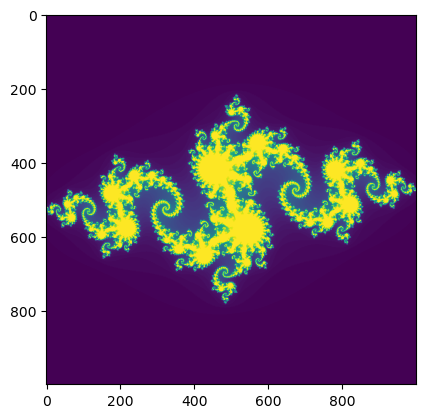

In [296]:
div_mat = julia_set(-0.8 + 0.156j, k=100)
plt.imshow(div_mat)

In [369]:
import math

def is_prime(n):
    for i in range(2, math.floor(math.sqrt(n) + 1)):
        if (n % i == 0):
            return False
    
    return True

vis_prime = np.vectorize(is_prime)

def ulam_spiral(n):
    int_spiral = integer_spiral_numpy(n)
    int_spiral[vis_prime(int_spiral)] = 1
    int_spiral[~vis_prime(int_spiral)] = 0

    return int_spiral


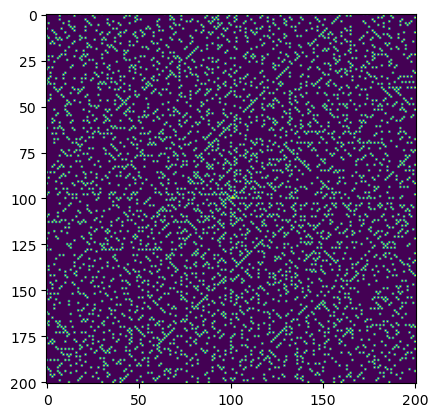

In [370]:
spiral = ulam_spiral(201)
plt.imshow(spiral)